# Lógica secuencial

En la lógica secuencial, los circuitos lógicos se retroalimentan de sus salidas y pueden conservar una salida, que se llamara estado, por tiempo indefinido. Por tanto, suelen usarse como parte de memorias. 

Los circuitos secuenciales más básicos son los flip-flops. Auquí similamos varios tipos de flip-flops y vemos sus aplicaciones en los contadores. 

## Pulso del reloj

Los circuitos que tomamos en cuenta serán síncronos; por tanto, necesitamos definir el pulso del reloj.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def clock_pulse(t,period=1):
    """
    Función que genera un reloj discreto a partir del seno.
    """
    
    return 1*(np.sin(period*t) > 0)

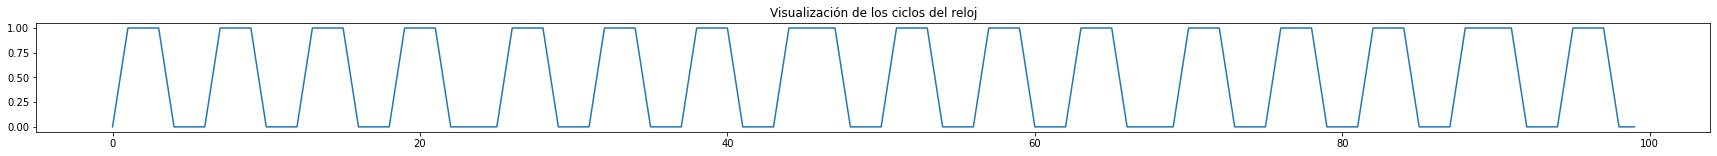

In [2]:
plt.figure(figsize=(30,2))
plt.plot([clock_pulse(t) for t in range(0,100)])
plt.title('Visualización de los ciclos del reloj')
plt.show()

## FlipFlop SR Asíncrono

Es un tipo de flip-flop Set-Reset sin ciclos de reloj. 

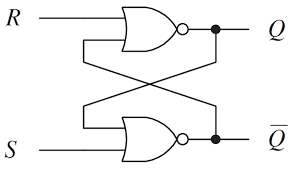

In [3]:
class FlipFlopSR(object):
    """
    Simulación de un circuito de flip-flop SR.
    """
    def __init__(self, Q=0):
        self.Q = Q
        self.notQ = 1-Q
    
    def run(self, S, R):
        #if S == 1 and R == 1:
        self.Q = S or (1-R)*self.Q
        self.notQ = 1-self.Q

        return self.Q, self.notQ

In [4]:
SR = FlipFlopSR()
print(1,0, SR.run(S=1,R=0))
print(0,0, SR.run(S=0,R=0))
print(0,1, SR.run(S=0,R=1))
print(0,0, SR.run(S=0,R=0))

1 0 (1, 0)
0 0 (1, 0)
0 1 (0, 1)
0 0 (0, 1)


## Flip-flop SR síncrono

![SR_Synch](https://www.tutorialspoint.com/digital_circuits/images/sr_flipflop.jpg)

In [5]:
class SynchFlipFlopSR(object):
    """
    Simulación de un flip-flo SR síncrono.
    """
    def __init__(self, Q=0):
        self.Q = Q
        self.notQ = 1-Q
        self.SR = FlipFlopSR()
        
    def run(self, S, R, CP=1):
        CR = R and CP
        CS = S and CP
        self.Q, self.notQ = self.SR.run(S=CS, R=CR)
        
        return self.Q, self.notQ

In [6]:
SynchSR = SynchFlipFlopSR()
print(1,0, SynchSR.run(S=1,R=0,CP=1))
print(0,0, SynchSR.run(S=0,R=0,CP=1))
print(0,1, SynchSR.run(S=0,R=1,CP=1))
print(0,0, SynchSR.run(S=0,R=0,CP=1))
print(1,0, SynchSR.run(S=0,R=1,CP=0))

1 0 (1, 0)
0 0 (1, 0)
0 1 (0, 1)
0 0 (0, 1)
1 0 (0, 1)


## Flip-flop D

![FlipFlopD](https://www.tutorialspoint.com/digital_circuits/images/d_flipflop.jpg)

In [7]:
class FlipFlopD(object):
    """
    Simulación de un flip-flop D.
    """
    def __init__(self, Q=0):
        self.Q = Q
        self.notQ = 1-Q
        self.flipflop = SynchFlipFlopSR(Q=Q)
        
    def run(self, D, CP=1):
        notD = 1-D
        self.Q, self.notQ = self.flipflop.run(S=D, R=notD, CP=CP)
        
        return self.Q, self.notQ

In [8]:
D = FlipFlopD()
print(D.Q, 0, D.run(D=0))
print(D.Q, 1, D.run(D=1))
print(D.Q, 1, D.run(D=1))
print(D.Q, 0, D.run(D=0))

0 0 (0, 1)
0 1 (1, 0)
1 1 (1, 0)
1 0 (0, 1)


## Flip-flop JK

![FlipFlopJK](https://www.tutorialspoint.com/digital_circuits/images/jk_flipflop.jpg)

In [9]:
class FlipFlopJK(object):
    """
    Simulación de un flip-flop JK.
    """
    def __init__(self, Q=0):
        self.Q = Q
        self.notQ = 1-Q
        self.flipflop = FlipFlopSR()
        
    def run(self, J, K, CP=1):
        if CP == 1:
            self.Q = J*self.notQ + (1-K)*self.Q
            self.notQ = 1-self.Q
        elif CP == 0:
            pass
        
        return self.Q, self.notQ

In [10]:
JK = FlipFlopJK()

print('Q', 'J', 'K', ' Q', '¬Q')
for j in [0,1]:
    for k in [0,1]:
        JK.Q = 0
        JK.notQ = 1
        print(JK.Q, j,k, JK.run(J=j, K=k))
        
for j in [0,1]:
    for k in [0,1]:
        JK.Q = 1
        JK.notQ = 0
        print(JK.Q, j,k, JK.run(J=j, K=k))

Q J K  Q ¬Q
0 0 0 (0, 1)
0 0 1 (0, 1)
0 1 0 (1, 0)
0 1 1 (1, 0)
1 0 0 (1, 0)
1 0 1 (0, 1)
1 1 0 (1, 0)
1 1 1 (0, 1)


## Transición de estados

Los flip-flop pueden estudiarse a partir de los diagramas de transición. Por ejemplo, podemos usar un flip-flop JK para transitar sobre 4 estados según el valor de un símbolo binario.

In [11]:
class Transitions(object):
    """
    Transición a partir de flip-flop JK.
    Realiza transiciones:
    
            x = 0     x = 1
    At Bt At+1 Bt+1 At+1 Bt+1
    0  0   0    0    0    1
    0  1   0    1    1    0
    1  0   1    0    1    1
    1  1   1    1    0    0
    """
    def __init__(self,A=0,B=0):
        self.A = A
        self.B = B
        self.SR_A = FlipFlopJK()
        self.SR_B = FlipFlopJK()
        
    def run(self, x, CP=1):
        not_x = 1-x
        J_A = not_x*self.B
        K_A = x*self.B
        J_B = x
        K_B = self.A*x or (1-self.A)*not_x
        
        self.A, notA = self.SR_A.run(J=J_A, K=K_A, CP=CP)
        self.B, notb = self.SR_B.run(J=J_B, K=K_B, CP=CP)
        
        return self.A, self.B

In [12]:
f = Transitions()

print('At','Bt', 'x','   At+1','Bt+1')
print(f.A,f.B, '-', 0, '->', f.run(0))
print(f.A,f.B, '-', 1, '->', f.run(1))
print(f.A,f.B, '-', 1, '->', f.run(1))
print(f.A,f.B, '-', 0, '->', f.run(0))
print(f.A,f.B, '-', 0, '->', f.run(0))
print(f.A,f.B, '-', 1, '->', f.run(1))
print(f.A,f.B, '-', 0, '->', f.run(0))
print(f.A,f.B, '-', 1, '->', f.run(1))

At Bt x    At+1 Bt+1
0 0 - 0 -> (0, 0)
0 0 - 1 -> (0, 1)
0 1 - 1 -> (0, 1)
0 1 - 0 -> (1, 0)
1 0 - 0 -> (1, 0)
1 0 - 1 -> (1, 1)
1 1 - 0 -> (1, 1)
1 1 - 1 -> (0, 0)


## Flip-flop T

![FlipFlopT](https://www.tutorialspoint.com/digital_circuits/images/t_flipflop.jpg)

In [13]:
class FlipFlopT(object):
    """
    Simulación de un Flip-flop T.
    """
    def __init__(self, Q=0):
        self.Q = Q
        self.notQ = 1-Q
        
    def run(self, T, CP=1):
        if CP == 1:
            self.Q = T*self.notQ + (1-T)*self.Q
            self.notQ = 1-self.Q
        elif CP == 0:
            pass
    
        return self.Q, self.notQ

In [14]:
T = FlipFlopT()

print('Q', 'T', ' Q', '¬Q')
print(T.Q, 0,T.run(0))
print(T.Q, 1,T.run(1))
print(T.Q, 0,T.run(0))
print(T.Q, 1,T.run(1))

Q T  Q ¬Q
0 0 (0, 1)
0 1 (1, 0)
1 0 (1, 0)
1 1 (0, 1)


## Contadores

Los contadores son circuitos secuenciales que cuentan de 0 a n; es decir que transitan de un estado binario al siguiente siempre con 1.

![Counter](http://datateca.unad.edu.co/contenidos/90178/90178_2014-1/Modulo_EXE/Descomprimido/flujo4)

In [15]:
class TransitionsT(object):
    def __init__(self,A=0,B=0):
        self.A = A
        self.B = B
        self.T_A = FlipFlopT()
        self.T_B = FlipFlopT()
        
    def run(self, x, CP=1):
        T_A = x*self.B
        self.A, notA = self.T_A.run(T=T_A, CP=CP)
        T_B = x      
        self.B, notb = self.T_B.run(T=T_B, CP=CP)
        
        return self.A, self.B, 2*self.A+self.B

In [16]:
counter = TransitionsT()

print('A','B', '-', 'T', '-> ', 'A', 'B', ' Dec')
print(counter.A, counter.B, '-', 0, '->', counter.run(0))
print(counter.A, counter.B, '-', 1, '->', counter.run(1))
print(counter.A, counter.B, '-', 0, '->', counter.run(0))
print(counter.A, counter.B, '-', 1, '->', counter.run(1))
print(counter.A, counter.B, '-', 0, '->', counter.run(0))
print(counter.A, counter.B, '-', 1, '->', counter.run(1))
print(counter.A, counter.B, '-', 0, '->', counter.run(0))
print(counter.A, counter.B, '-', 1, '->', counter.run(1))

A B - T ->  A B  Dec
0 0 - 0 -> (0, 0, 0)
0 0 - 1 -> (0, 1, 1)
0 1 - 0 -> (0, 1, 1)
0 1 - 1 -> (1, 0, 2)
1 0 - 0 -> (1, 0, 2)
1 0 - 1 -> (1, 1, 3)
1 1 - 0 -> (1, 1, 3)
1 1 - 1 -> (0, 0, 0)


## Contador 0 a 7

In [17]:
class Counter():
    def __init__(self, d0=0,d1=0,d2=0,d3=0):
        self.T1 = FlipFlopT(Q=0)
        self.T2 = FlipFlopT(Q=0)
        self.T3 = FlipFlopT(Q=0)
        
        self.d0,self.d1,self.d2,self.d3 = d0,d1,d2,d3
    
    def count(self, x, CP=1):
        T_2 = x*self.d0*self.d1
        self.d2, notd2 = self.T1.run(T=T_2, CP=CP)
        T_1 = x*self.d0
        self.d1, notd1 = self.T2.run(T=T_1, CP=CP)
        T_0 = x      
        self.d0, notd0 = self.T3.run(T=T_0, CP=CP)
        
        return self.d2, self.d1, self.d0, 4*self.d2 + 2*self.d1 + self.d0

In [18]:
counter = Counter()

print('d2', 'd1', 'd0', ' Dec')
print(counter.count(0))
print(counter.count(1))
print(counter.count(0))
print(counter.count(1))
print(counter.count(0))
print(counter.count(1))
print(counter.count(0))
print(counter.count(1))
print(counter.count(0))
print(counter.count(1))
print(counter.count(0))
print(counter.count(1))
print(counter.count(0))
print(counter.count(1))
print(counter.count(0))
print(counter.count(1))

d2 d1 d0  Dec
(0, 0, 0, 0)
(0, 0, 1, 1)
(0, 0, 1, 1)
(0, 1, 0, 2)
(0, 1, 0, 2)
(0, 1, 1, 3)
(0, 1, 1, 3)
(1, 0, 0, 4)
(1, 0, 0, 4)
(1, 0, 1, 5)
(1, 0, 1, 5)
(1, 1, 0, 6)
(1, 1, 0, 6)
(1, 1, 1, 7)
(1, 1, 1, 7)
(0, 0, 0, 0)


## Contador de 0 a 15

In [19]:
class HexCounter():
    def __init__(self, d0=0,d1=0,d2=0,d3=0):
        self.T1 = FlipFlopT(Q=0)
        self.T2 = FlipFlopT(Q=0)
        self.T3 = FlipFlopT(Q=0)
        self.T4 = FlipFlopT(Q=0)
        
        self.d0,self.d1,self.d2,self.d3 = d0,d1,d2,d3
    
    def count(self, x, CP=1):
        T_4 = x*self.d0*self.d1*self.d2
        self.d3, notd2 = self.T4.run(T=T_4, CP=CP)
        T_2 = x*self.d0*self.d1*self.d1
        self.d2, notd2 = self.T1.run(T=T_2, CP=CP)
        T_1 = x*self.d0
        self.d1, notd1 = self.T2.run(T=T_1, CP=CP)
        T_0 = x      
        self.d0, notd0 = self.T3.run(T=T_0, CP=CP)
        
        return 8*self.d3 + 4*self.d2 + 2*self.d1 + self.d0

In [20]:
hex_counter = HexCounter()

for i in range(0,16):
    print(hex_counter.count(1))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
0
